# Spam Detection 
- [Dataset-link](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# Read the data
df = pd.read_csv("spam.csv")
# df_= pd.read_csv("mail_data.csv") #they are both same dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## steps

- Data cleaning
- EDA
- Text Preporcessing
- Model Building
- Evaluation
- Inprovement
- Website
- Deploy

In [5]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)
df.sample(2)

,v1,v2
5371,ham,"Lol, oh you got a friend for the dog ?"
2324,ham,Ok lor.


In [6]:
#renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(2)

,target,text
1978,ham,No I'm in the same boat. Still here at my moms...
3579,ham,Have a lovely night and when you wake up to se...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df["target"] = encoder.fit_transform(df["target"])
df.sample(2)

,target,text
4693,0,Pls give her the food preferably pap very slow...
3701,0,Hey loverboy! I love you !! I had to tell ... ...


In [9]:
# checking for missing values

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#check for duplicate value

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep="first")
# df.tail(3)
df.shape

(5169, 2)

# 2.EDA

In [14]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x75b583755070>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

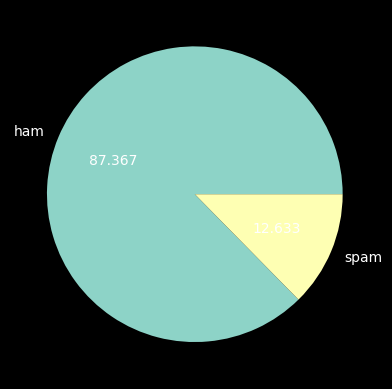

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham","spam"],autopct="%0.3f")

`data is imbalanced`

In [16]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/chaos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df["num_characters"] = df["text"].apply(len)
df.sample(3)

,target,text,num_characters
2097,0,Are you the cutest girl in the world or what,44
3320,0,Yo im right by yo work,22
3744,0,"Aight, let me know when you're gonna be around...",50


In [18]:
#break the sentence into indivisual words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(3)

,target,text,num_characters,num_words
1487,0,I told your number to gautham..,31,7
4000,0,He's just gonna worry for nothing. And he won'...,74,20
3213,0,"Babe, have you got enough money to pick up bre...",105,26


In [19]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(3)

,target,text,num_characters,num_words,num_sentences
150,0,The wine is flowing and i'm i have nevering..,45,11,1
3480,0,Wherre's my boytoy ? :-(,24,8,2
3078,0,*deep sigh* ... I miss you :-( ... I am really...,129,36,3


In [20]:
#getting more information about the newly made 3 columns
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# get more info about the ham(not_spam)
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# get more info about the spam
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


# Data-Viz

In [23]:
#importing modules
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

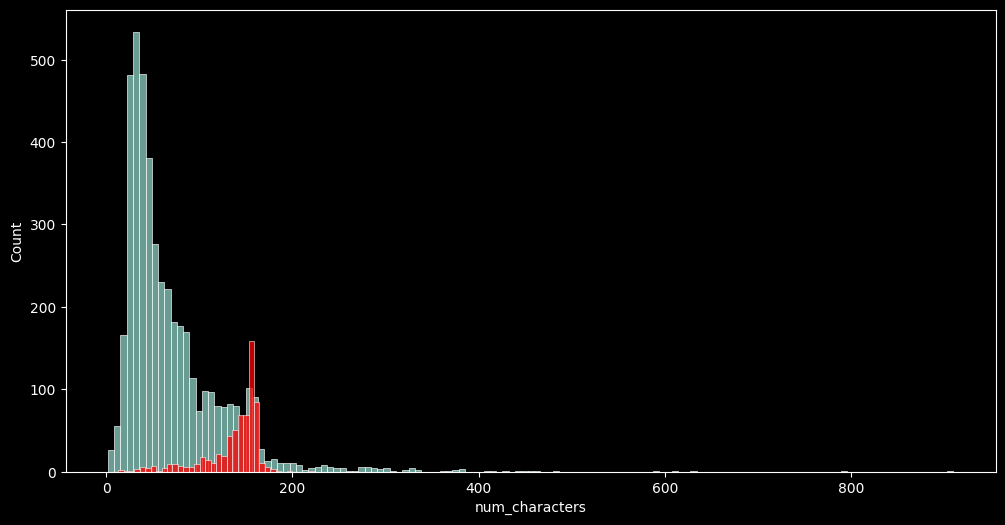

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

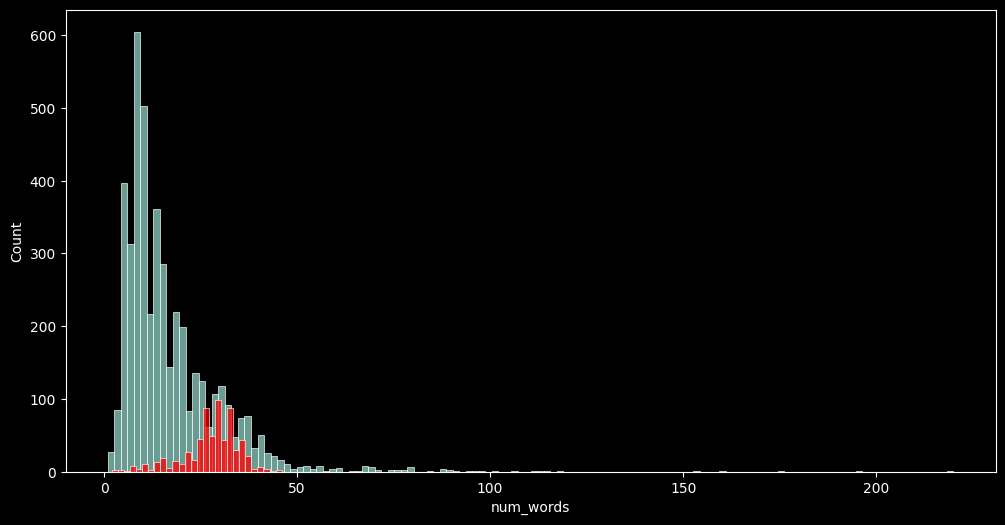

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"],color="red")

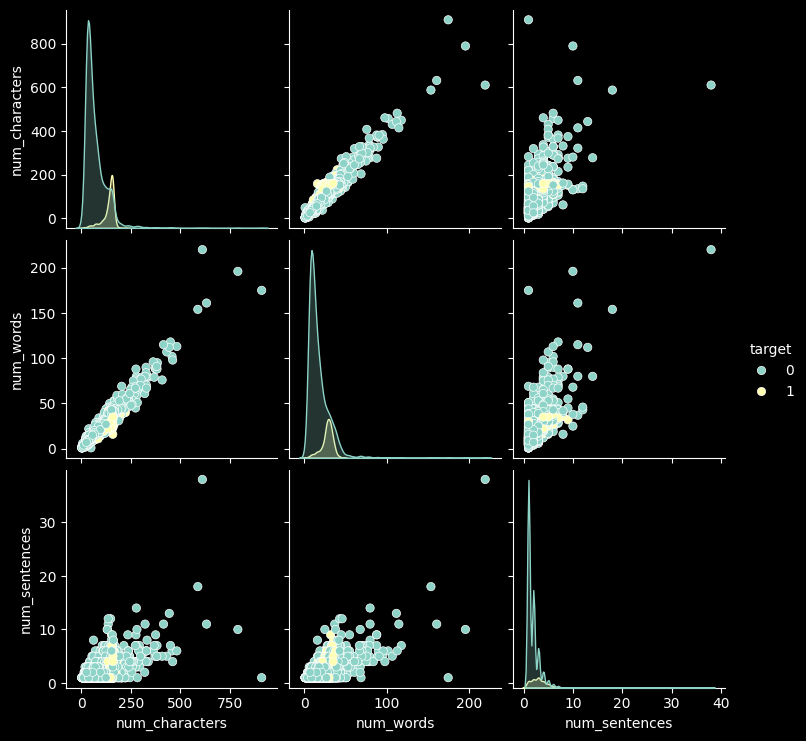

In [26]:
sns.pairplot(df,hue="target")

In [27]:
# sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
- lower case
- tokenization
- removing special char
- removing stop words and punctuation
- stemming

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def transform_texts(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    ps = PorterStemmer()
    for i in text: 
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(ps.stem(i))
            
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [29]:
df["text"][56]

'Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! '

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [31]:
df["transformed_text"] = df["text"].apply(transform_texts)

# Vectorization:

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()
y = df["target"]


# Train-Test Split:



In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training:



In [34]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Evaluation

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9729206963249516
Precision: 0.9915966386554622
Recall: 0.8137931034482758
F1 Score: 0.893939393939394


In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9729206963249516
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Confusion Matrix:
[[888   1]
 [ 27 118]]


# Save the Model:


In [40]:
import joblib

joblib.dump(model, "spam_classifier_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

# Load the model

In [ ]:
# model = joblib.load("spam_classifier_model.pkl")
# tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")


### Explanation:
- **numpy**: Fundamental package for scientific computing with Python.
- **pandas**: Data analysis library providing high-performance data structures and tools.
- **scikit-learn**: Machine learning library for classical algorithms in Python.
- **nltk**: Natural Language Toolkit for text processing and NLP tasks.
- **matplotlib**: Comprehensive plotting library for creating static, animated, and interactive visualizations in Python.
- **seaborn**: Statistical data visualization based on matplotlib, providing attractive and informative statistical graphics.
- **streamlit**: Open-source app framework for machine learning and data science teams.
- **joblib**: Tools for pipelining Python functions and persistent caching.